In [1]:
import numpy as np 
import pandas as pd 
import sklearn
import matplotlib
import keras 
import sys
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns

2024-04-09 14:00:56.071476: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-09 14:00:56.071906: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-09 14:00:56.074672: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-09 14:00:56.104635: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-09 14:00:56.662236: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF

# 1.Importing the Dataset

In [2]:
# read the csv
df = pd.read_csv('diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
# print the shape of the DataFrame, so we can see how many examples we have
print( 'Shape of DataFrame: {}'.format(df.shape))
print (df.loc[1])

Shape of DataFrame: (768, 9)
Pregnancies                  1.000
Glucose                     85.000
BloodPressure               66.000
SkinThickness               29.000
Insulin                      0.000
BMI                         26.600
DiabetesPedigreeFunction     0.351
Age                         31.000
Outcome                      0.000
Name: 1, dtype: float64


In [6]:
# print the last twenty or so data points
df.loc[748:]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
748,3,187,70,22,200,36.4,0.408,36,1
749,6,162,62,0,0,24.3,0.178,50,1
750,4,136,70,0,0,31.2,1.182,22,1
751,1,121,78,39,74,39.0,0.261,28,0
752,3,108,62,24,0,26.0,0.223,25,0
753,0,181,88,44,510,43.3,0.222,26,1
754,8,154,78,32,0,32.4,0.443,45,1
755,1,128,88,39,110,36.5,1.057,37,1
756,7,137,90,41,0,32.0,0.391,39,0
757,0,123,72,0,0,36.3,0.258,52,1


In [7]:
# remove missing data (indicated with a "?")
data = df[~df.isin(['?'])]
data.loc[1:]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [8]:
# drop rows with NaN values from DataFrame
data = data.dropna(axis=0)
data.loc[1:]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [9]:
# print the shape and data type of the dataframe
print(data.shape)
print(data.dtypes)

(768, 9)
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


**Transform data to numeric to enable further analysis**

In [10]:
# transform data to numeric to enable further analysis
data = data.apply(pd.to_numeric)
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

** Data characteristics, usings pandas built-in describe() function**

In [11]:
# print data characteristics, usings pandas built-in describe() function
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


** Histograms for each variable**

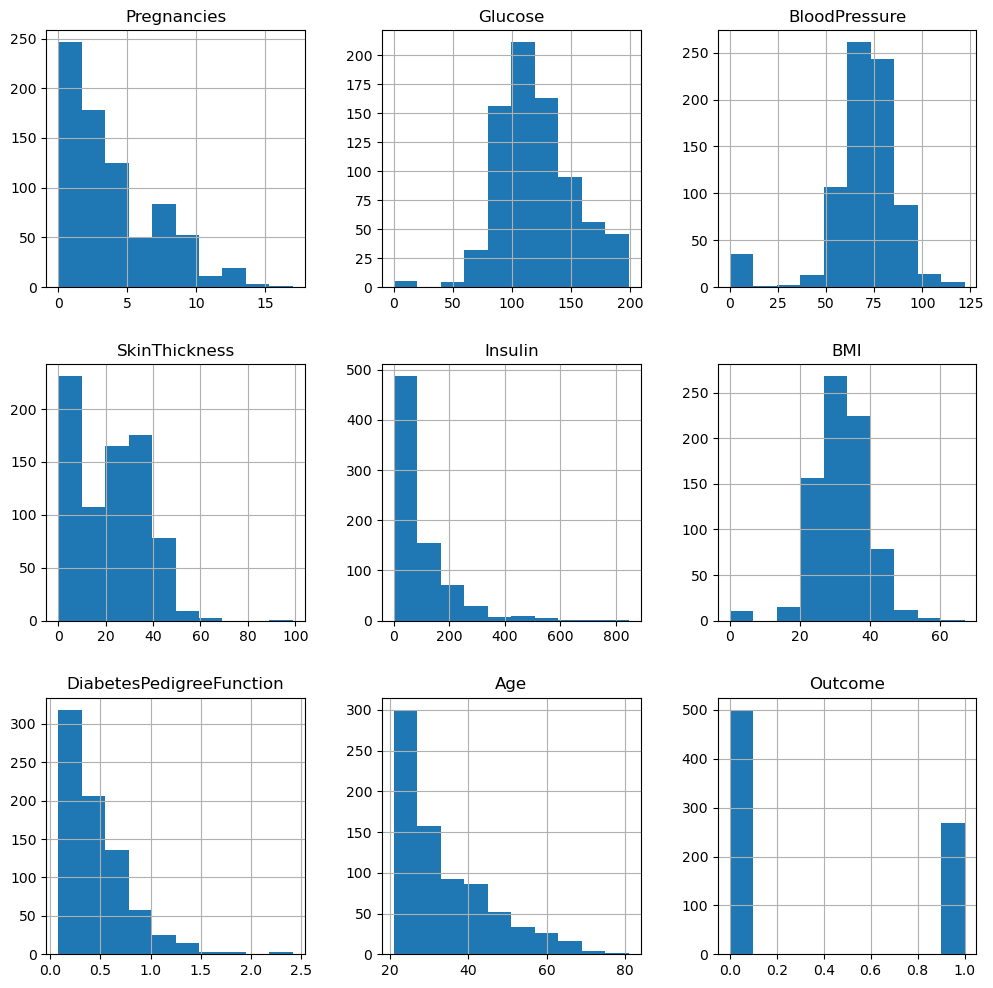

In [12]:
# plot histograms for each variable
data.hist(figsize = (12, 12))
plt.show()

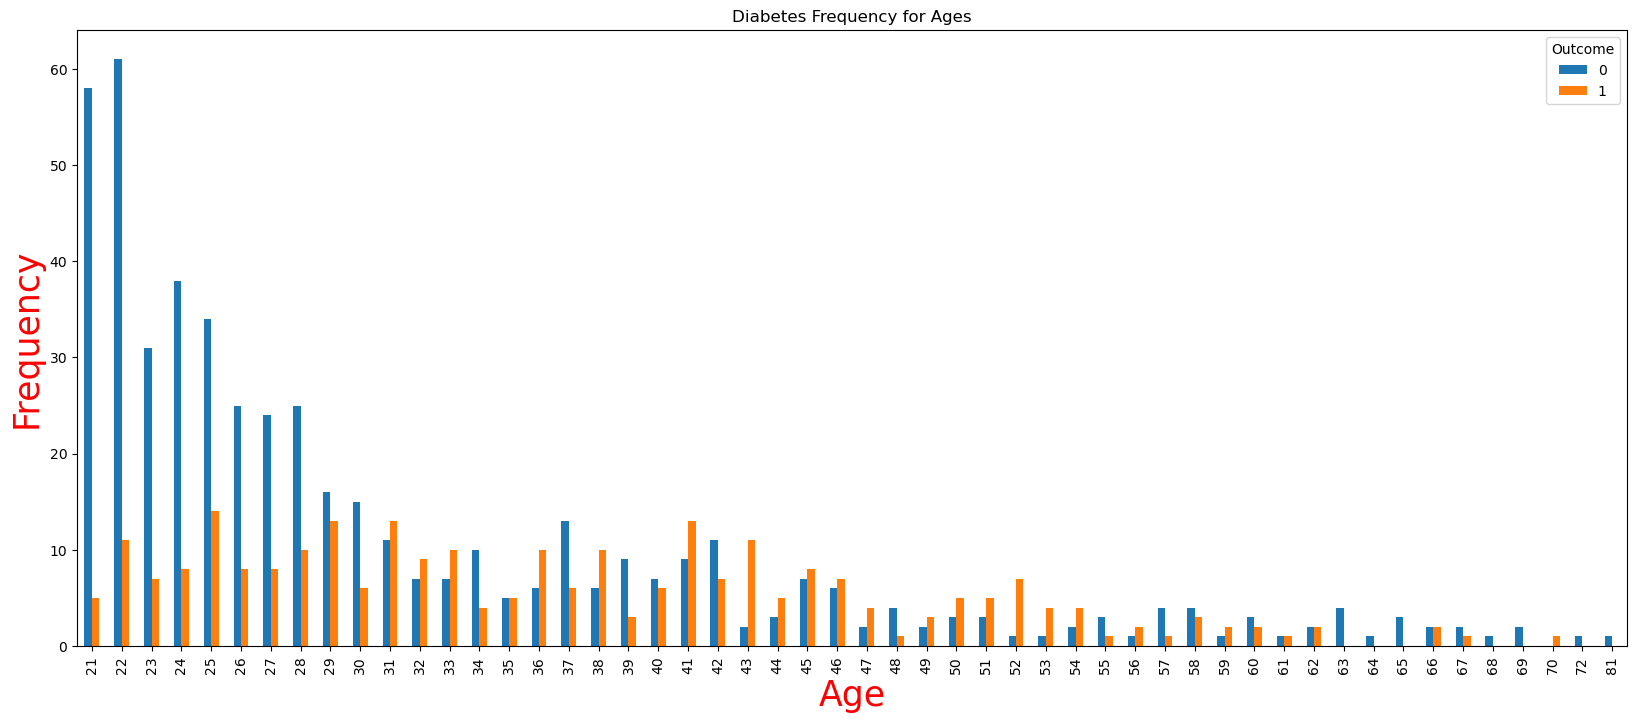

In [13]:
pd.crosstab(data.Age,data.Outcome).plot(kind="bar",figsize=(20,8))
plt.title('Diabetes Frequency for Ages')
plt.xlabel('Age',color='red',size=25)
plt.ylabel('Frequency',color='red',size=25)
plt.show()

**Heatmap for each variable**

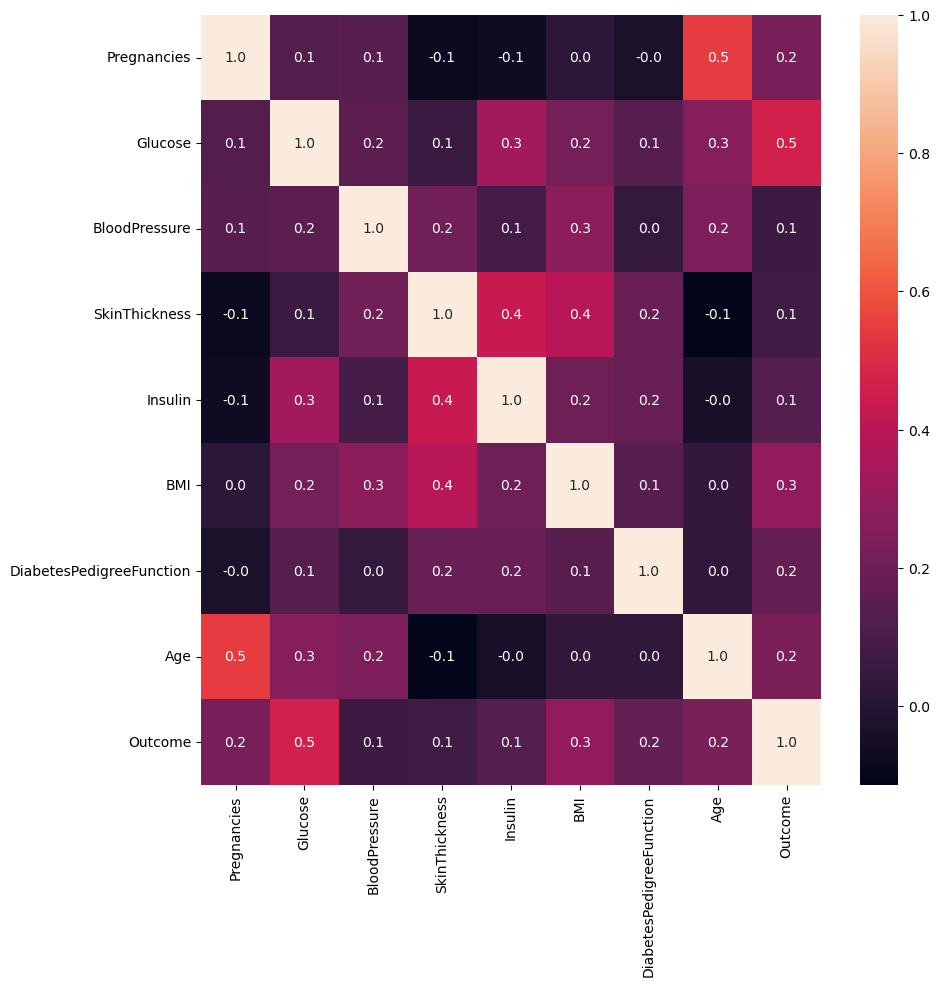

In [14]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True,fmt='.1f')
plt.show()

**Age vs DiabetesPedigreeFunction**

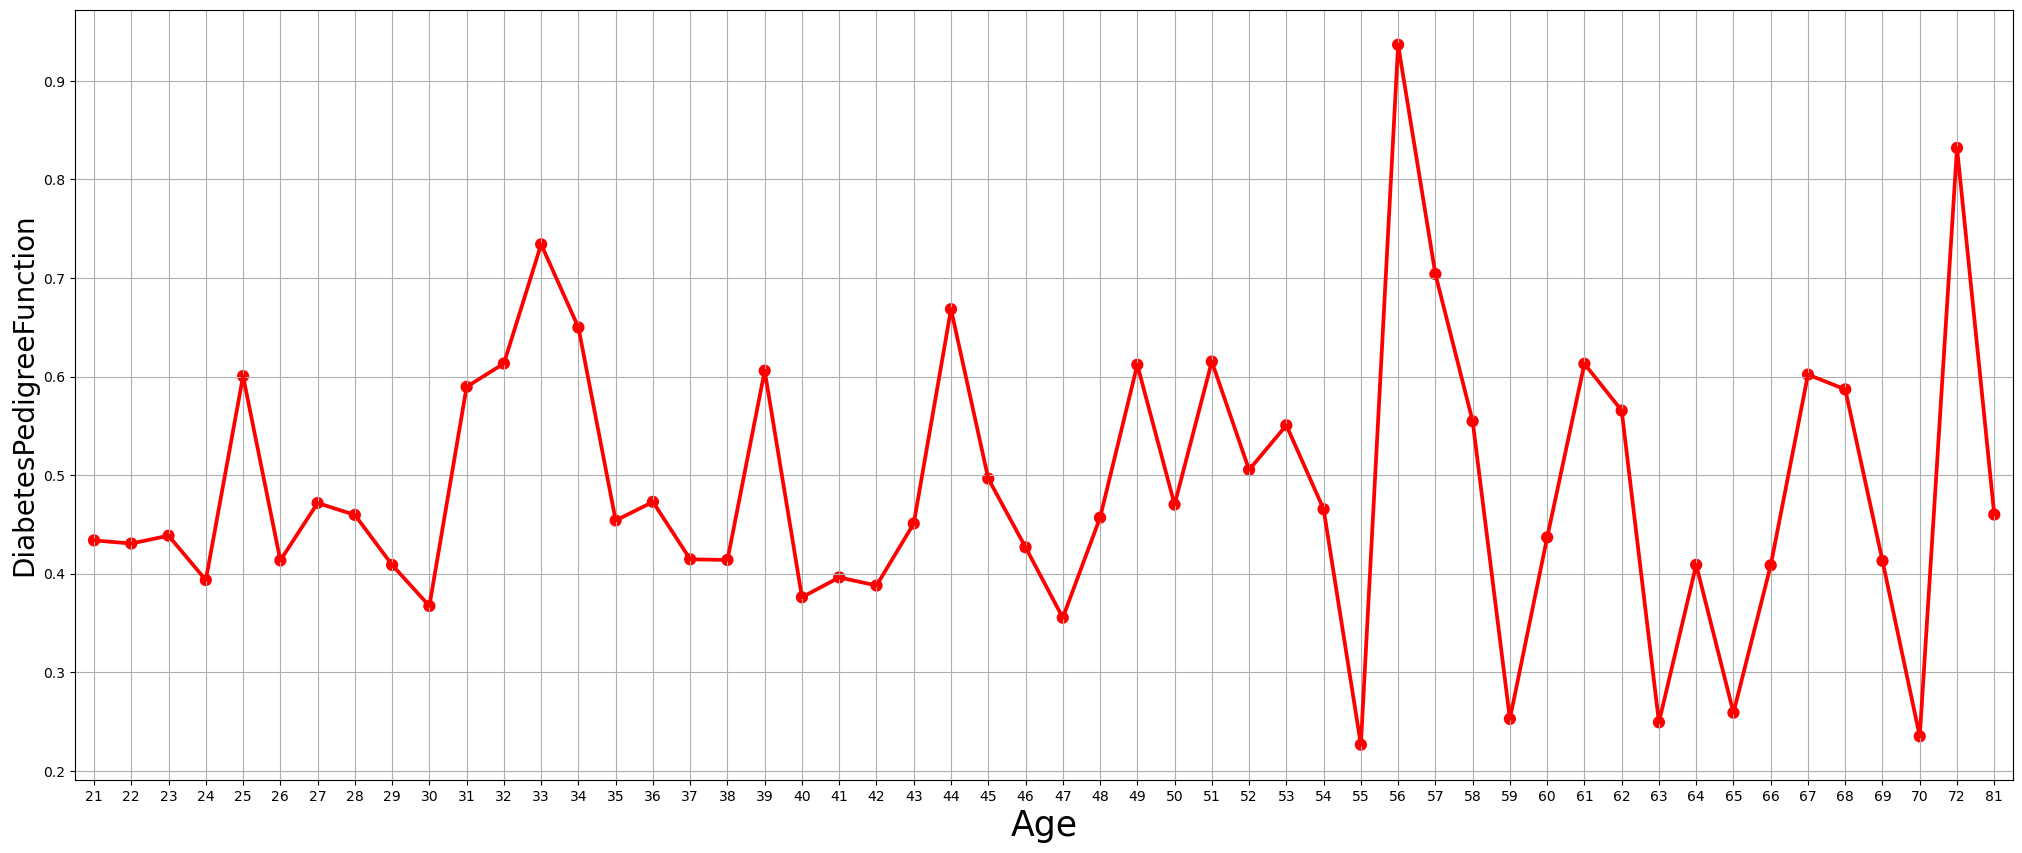

In [15]:
age_unique=sorted(data.Age.unique())
age_DiabetesPedigreeFunction_values=data.groupby('Age')['DiabetesPedigreeFunction'].count().values
mean_DiabetesPedigreeFunction=[]
for i,Age in enumerate(age_unique):
    mean_DiabetesPedigreeFunction.append(sum(data[data['Age']==Age].DiabetesPedigreeFunction)/age_DiabetesPedigreeFunction_values[i])
    
plt.figure(figsize=(25, 10))
sns.pointplot(x=age_unique, y=mean_DiabetesPedigreeFunction, color='red')
plt.xlabel('Age', fontsize=25, color='black')
plt.ylabel('DiabetesPedigreeFunction', fontsize=20, color='black')
plt.grid()

# 2.Create Training and Testing Datasets

**Now that we have preprocessed the data appropriately, we can split it into training and testings datasets. We will use Sklearn's train_test_split() function to generate a training dataset (80 percent of the total data) and testing dataset (20 percent of the total data).**



In [16]:
X = np.array(data.drop(['Outcome'],1))
y = np.array(data['Outcome'])

/tmp/ipykernel_231953/482882832.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(data.drop(['Outcome'],1))


In [17]:
X[0]

array([  6.   , 148.   ,  72.   ,  35.   ,   0.   ,  33.6  ,   0.627,
        50.   ])

In [115]:
mean = X.mean(axis=0)
X -= mean
std = X.std(axis=0)
X /= std

In [116]:
X[0]

array([ 0.63994726,  0.84832379,  0.14964075,  0.90726993, -0.69289057,
        0.20401277,  0.46849198,  1.4259954 ])

In [117]:
# create X and Y datasets for training
from sklearn import model_selection

In [21]:
# convert the data to categorical labels
from keras.utils import to_categorical

Y_train = to_categorical(y_train, num_classes=None)
Y_test = to_categorical(y_test, num_classes=None)
print (Y_train.shape)
print (Y_train[:768])

(192, 2)
[[0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 

In [22]:
X_train[0]


array([ 2.42174604, -0.90431634, -0.36733675, -0.84911579,  1.54729658,
       -0.5575027 ,  1.37150746,  0.91546889])

# 3.Building and Training the Neural Network

In [23]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam, SGD
from keras import regularizers

# Define a function to build the Keras model
S

# Build the Keras model
model = build_model()

# Print the model summary
print(model.summary())


/home/suyog/anaconda3/lib/python3.10/site-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,866 (19.01 KB)

 Trainable params: 4,866 (19.01 KB)

 Non-trainable params: 0 (0.00 B)

None


In [24]:
# fit the model to the training data
history=model.fit(X_train, Y_train, validation_data=(X_test, Y_test),epochs= 1000,batch_size=32)

Epoch 1/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.6302 - loss: 0.6935 - val_accuracy: 0.6840 - val_loss: 0.6792
Epoch 2/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6965 - loss: 0.6703 - val_accuracy: 0.6962 - val_loss: 0.6575
Epoch 3/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7086 - loss: 0.6451 - val_accuracy: 0.7014 - val_loss: 0.6328
Epoch 4/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7248 - loss: 0.6237 - val_accuracy: 0.7205 - val_loss: 0.6067
Epoch 5/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7637 - loss: 0.5766 - val_accuracy: 0.7292 - val_loss: 0.5810
Epoch 6/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7310 - loss: 0.5534 - val_accuracy: 0.7378 - val_loss: 0.5581
Epoch 7/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7368 - loss: 0.5197 - val_accuracy: 0.7552 - val_loss: 0.5387
Epoch 8/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7803 - loss: 0.4938 - val_accuracy: 0.7552 - val_loss

Epoch 52/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8815 - loss: 0.2969 - val_accuracy: 0.7500 - val_loss: 0.5716
Epoch 53/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8918 - loss: 0.3280 - val_accuracy: 0.7552 - val_loss: 0.5736
Epoch 54/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8967 - loss: 0.2879 - val_accuracy: 0.7604 - val_loss: 0.5762
Epoch 55/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8672 - loss: 0.3433 - val_accuracy: 0.7639 - val_loss: 0.5779
Epoch 56/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8426 - loss: 0.3308 - val_accuracy: 0.7622 - val_loss: 0.5769
Epoch 57/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8926 - loss: 0.3157 - val_accuracy: 0.7535 - val_loss: 0.5812
Epoch 58/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8212 - loss: 0.3649 - val_accuracy: 0.7535 - val_loss: 0.5853
Epoch 59/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8552 - loss: 0.3324 - val_accuracy: 0.7569 - v

Epoch 103/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9350 - loss: 0.2193 - val_accuracy: 0.7500 - val_loss: 0.6825
Epoch 104/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9167 - loss: 0.2665 - val_accuracy: 0.7500 - val_loss: 0.6840
Epoch 105/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8981 - loss: 0.2935 - val_accuracy: 0.7500 - val_loss: 0.6853
Epoch 106/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8974 - loss: 0.3113 - val_accuracy: 0.7569 - val_loss: 0.6912
Epoch 107/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9158 - loss: 0.2567 - val_accuracy: 0.7569 - val_loss: 0.6856
Epoch 108/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9378 - loss: 0.2106 - val_accuracy: 0.7535 - val_loss: 0.6891
Epoch 109/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9270 - loss: 0.2525 - val_accuracy: 0.7535 - val_loss: 0.6954
Epoch 110/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8885 - loss: 0.2968 - val_accuracy: 0.

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9103 - loss: 0.2571 - val_accuracy: 0.7344 - val_loss: 0.8588
Epoch 204/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9304 - loss: 0.1999 - val_accuracy: 0.7240 - val_loss: 0.8578
Epoch 205/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9440 - loss: 0.1935 - val_accuracy: 0.7292 - val_loss: 0.8605
Epoch 206/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9188 - loss: 0.1926 - val_accuracy: 0.7413 - val_loss: 0.8673
Epoch 207/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9455 - loss: 0.1735 - val_accuracy: 0.7309 - val_loss: 0.8744
Epoch 208/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9455 - loss: 0.1816 - val_accuracy: 0.7378 - val_loss: 0.8782
Epoch 209/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9501 - loss: 0.1648 - val_accuracy: 0.7309 - val_loss: 0.8924
Epoch 210/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9603 - loss: 0.1571 - val_accuracy: 0.7344 - val_loss

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9620 - loss: 0.1371 - val_accuracy: 0.7431 - val_loss: 1.0224
Epoch 304/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9614 - loss: 0.1216 - val_accuracy: 0.7396 - val_loss: 1.0347
Epoch 305/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9340 - loss: 0.1959 - val_accuracy: 0.7378 - val_loss: 1.0403
Epoch 306/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9641 - loss: 0.1514 - val_accuracy: 0.7361 - val_loss: 1.0336
Epoch 307/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9660 - loss: 0.1658 - val_accuracy: 0.7465 - val_loss: 1.0260
Epoch 308/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9524 - loss: 0.1970 - val_accuracy: 0.7448 - val_loss: 1.0341
Epoch 309/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9808 - loss: 0.1396 - val_accuracy: 0.7396 - val_loss: 1.0350
Epoch 310/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9432 - loss: 0.1716 - val_accuracy: 0.7378 - val_loss

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9543 - loss: 0.1684 - val_accuracy: 0.7396 - val_loss: 1.1939
Epoch 404/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9926 - loss: 0.1230 - val_accuracy: 0.7483 - val_loss: 1.1786
Epoch 405/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9795 - loss: 0.1332 - val_accuracy: 0.7448 - val_loss: 1.1754
Epoch 406/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9678 - loss: 0.1622 - val_accuracy: 0.7465 - val_loss: 1.1656
Epoch 407/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9604 - loss: 0.1268 - val_accuracy: 0.7517 - val_loss: 1.1595
Epoch 408/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9705 - loss: 0.1264 - val_accuracy: 0.7500 - val_loss: 1.1619
Epoch 409/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9533 - loss: 0.1323 - val_accuracy: 0.7483 - val_loss: 1.1713
Epoch 410/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9376 - loss: 0.2087 - val_accuracy: 0.7448 - val_loss

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9804 - loss: 0.1086 - val_accuracy: 0.7431 - val_loss: 1.2526
Epoch 504/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9498 - loss: 0.1319 - val_accuracy: 0.7396 - val_loss: 1.2394
Epoch 505/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9863 - loss: 0.1030 - val_accuracy: 0.7361 - val_loss: 1.2406
Epoch 506/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9775 - loss: 0.0966 - val_accuracy: 0.7274 - val_loss: 1.2457
Epoch 507/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9950 - loss: 0.0872 - val_accuracy: 0.7274 - val_loss: 1.2485
Epoch 508/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9748 - loss: 0.1344 - val_accuracy: 0.7309 - val_loss: 1.2622
Epoch 509/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9795 - loss: 0.1005 - val_accuracy: 0.7344 - val_loss: 1.2830
Epoch 510/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9868 - loss: 0.1066 - val_accuracy: 0.7378 - val_loss

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9930 - loss: 0.0803 - val_accuracy: 0.7326 - val_loss: 1.3385
Epoch 604/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9507 - loss: 0.1335 - val_accuracy: 0.7257 - val_loss: 1.3398
Epoch 605/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9806 - loss: 0.1045 - val_accuracy: 0.7274 - val_loss: 1.3751
Epoch 606/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 0.0897 - val_accuracy: 0.7257 - val_loss: 1.3969
Epoch 607/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9911 - loss: 0.0949 - val_accuracy: 0.7309 - val_loss: 1.3953
Epoch 608/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9675 - loss: 0.1187 - val_accuracy: 0.7396 - val_loss: 1.3980
Epoch 609/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9850 - loss: 0.1051 - val_accuracy: 0.7431 - val_loss: 1.3993
Epoch 610/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9776 - loss: 0.0996 - val_accuracy: 0.7396 - val_loss

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9893 - loss: 0.0906 - val_accuracy: 0.7361 - val_loss: 1.4074
Epoch 704/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9985 - loss: 0.0800 - val_accuracy: 0.7326 - val_loss: 1.4271
Epoch 705/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9795 - loss: 0.1108 - val_accuracy: 0.7361 - val_loss: 1.4409
Epoch 706/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9928 - loss: 0.0838 - val_accuracy: 0.7378 - val_loss: 1.4432
Epoch 707/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9871 - loss: 0.0856 - val_accuracy: 0.7413 - val_loss: 1.4160
Epoch 708/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9900 - loss: 0.1022 - val_accuracy: 0.7413 - val_loss: 1.3892
Epoch 709/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9885 - loss: 0.0909 - val_accuracy: 0.7448 - val_loss: 1.3811
Epoch 710/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9474 - loss: 0.1529 - val_accuracy: 0.7465 - val_loss

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9976 - loss: 0.0799 - val_accuracy: 0.7153 - val_loss: 1.4577
Epoch 804/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9848 - loss: 0.0915 - val_accuracy: 0.7274 - val_loss: 1.4485
Epoch 805/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9950 - loss: 0.0773 - val_accuracy: 0.7240 - val_loss: 1.4516
Epoch 806/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9920 - loss: 0.0812 - val_accuracy: 0.7309 - val_loss: 1.4596
Epoch 807/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9643 - loss: 0.1253 - val_accuracy: 0.7274 - val_loss: 1.4898
Epoch 808/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9724 - loss: 0.1145 - val_accuracy: 0.7240 - val_loss: 1.5364
Epoch 809/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9833 - loss: 0.1034 - val_accuracy: 0.7292 - val_loss: 1.5479
Epoch 810/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9868 - loss: 0.1080 - val_accuracy: 0.7292 - val_loss

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9713 - loss: 0.0997 - val_accuracy: 0.7396 - val_loss: 1.5252
Epoch 904/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9811 - loss: 0.0929 - val_accuracy: 0.7483 - val_loss: 1.5145
Epoch 905/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9946 - loss: 0.0758 - val_accuracy: 0.7483 - val_loss: 1.4891
Epoch 906/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9760 - loss: 0.0923 - val_accuracy: 0.7413 - val_loss: 1.4349
Epoch 907/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9758 - loss: 0.0841 - val_accuracy: 0.7222 - val_loss: 1.4145
Epoch 908/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9783 - loss: 0.0974 - val_accuracy: 0.7257 - val_loss: 1.4058
Epoch 909/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9848 - loss: 0.0792 - val_accuracy: 0.7309 - val_loss: 1.4093
Epoch 910/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9833 - loss: 0.1000 - val_accuracy: 0.7361 - val_loss

**Model accuracy**

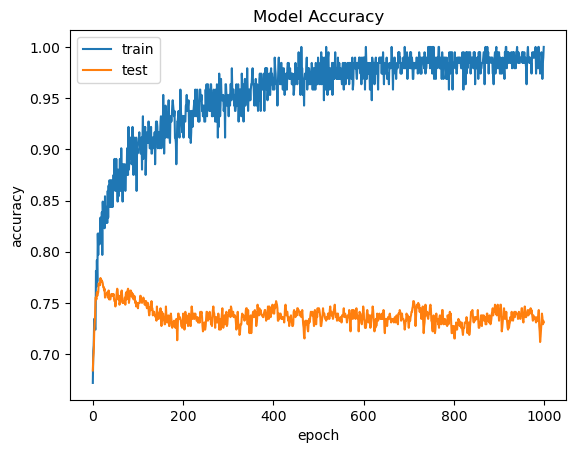

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
# Model accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

**Model Losss**

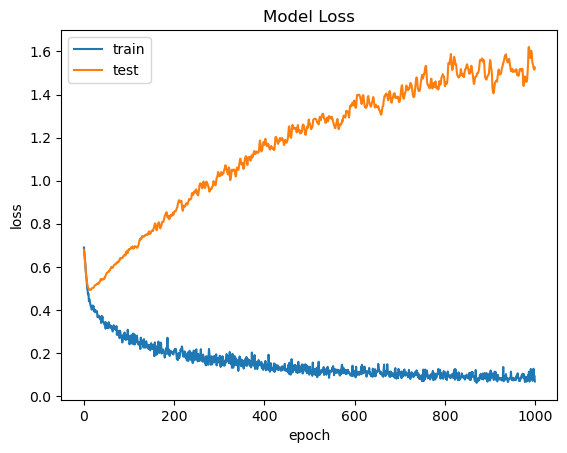

In [26]:
# Model Losss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

# 4.Improving Results - A Binary Classification Problem

In [118]:
# convert into binary classification problem - outcome
Y_train_binary = y_train.copy()
Y_test_binary = y_test.copy()

Y_train_binary[Y_train_binary > 0] = 1
Y_test_binary[Y_test_binary > 0] = 1

print(Y_train_binary[:768])

[1 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 1 1 1 0 1 0 1 1 0 1
 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0
 0 0 0 1 1 1 1 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1 1 1 0 1 0 0 0 1 1
 0 0 0 1 0 1 1 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 1 0
 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0
 0 0 1 0 0 0 0]


In [134]:
# Define a function to create a Keras model for binary classification
def create_binary_model():
    # Create the model architecture
    model = Sequential()
    model.add(Dense(64, input_dim=8, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(64, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(1, activation='sigmoid'))
    
    # Compile the model
    optimizer = Adam(learning_rate=0.001)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    
    return model

# Create the binary classification model
binary_model = create_binary_model()

# Print the model summary
print(binary_model.summary())


/home/suyog/anaconda3/lib/python3.10/site-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,801 (18.75 KB)

 Trainable params: 4,801 (18.75 KB)

 Non-trainable params: 0 (0.00 B)

None


In [135]:
# fit the binary model on the training data
history=binary_model.fit(X_train, Y_train_binary, validation_data=(X_test, Y_test_binary), epochs=1000, batch_size=32)

Epoch 1/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.6114 - loss: 0.6986 - val_accuracy: 0.6806 - val_loss: 0.6858
Epoch 2/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6768 - loss: 0.6811 - val_accuracy: 0.7066 - val_loss: 0.6669
Epoch 3/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7204 - loss: 0.6606 - val_accuracy: 0.7135 - val_loss: 0.6457
Epoch 4/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7626 - loss: 0.6272 - val_accuracy: 0.7274 - val_loss: 0.6213
Epoch 5/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7750 - loss: 0.5941 - val_accuracy: 0.7413 - val_loss: 0.5962
Epoch 6/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7323 - loss: 0.5821 - val_accuracy: 0.7448 - val_loss: 0.5720
Epoch 7/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7401 - loss: 0.5637 - val_accuracy: 0.7431 - val_loss: 0.5503
Epoch 8/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7842 - loss: 0.5374 - val_accuracy: 0.7465 - val_loss

Epoch 52/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8663 - loss: 0.3776 - val_accuracy: 0.7517 - val_loss: 0.5477
Epoch 53/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9004 - loss: 0.3064 - val_accuracy: 0.7587 - val_loss: 0.5475
Epoch 54/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8435 - loss: 0.3646 - val_accuracy: 0.7587 - val_loss: 0.5465
Epoch 55/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8141 - loss: 0.3838 - val_accuracy: 0.7587 - val_loss: 0.5482
Epoch 56/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8784 - loss: 0.3081 - val_accuracy: 0.7569 - val_loss: 0.5497
Epoch 57/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8587 - loss: 0.3263 - val_accuracy: 0.7587 - val_loss: 0.5521
Epoch 58/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8801 - loss: 0.3040 - val_accuracy: 0.7500 - val_loss: 0.5598
Epoch 59/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8697 - loss: 0.3473 - val_accuracy: 0.7448 - v

Epoch 103/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8934 - loss: 0.2933 - val_accuracy: 0.7378 - val_loss: 0.6740
Epoch 104/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8686 - loss: 0.2990 - val_accuracy: 0.7326 - val_loss: 0.6738
Epoch 105/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9326 - loss: 0.2481 - val_accuracy: 0.7309 - val_loss: 0.6733
Epoch 106/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9247 - loss: 0.2249 - val_accuracy: 0.7309 - val_loss: 0.6782
Epoch 107/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9167 - loss: 0.2257 - val_accuracy: 0.7344 - val_loss: 0.6794
Epoch 108/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9190 - loss: 0.2318 - val_accuracy: 0.7361 - val_loss: 0.6837
Epoch 109/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9213 - loss: 0.2567 - val_accuracy: 0.7344 - val_loss: 0.6850
Epoch 110/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8922 - loss: 0.2789 - val_accuracy: 0.

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8847 - loss: 0.2545 - val_accuracy: 0.7344 - val_loss: 0.8059
Epoch 204/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8818 - loss: 0.2818 - val_accuracy: 0.7309 - val_loss: 0.8005
Epoch 205/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9217 - loss: 0.2403 - val_accuracy: 0.7309 - val_loss: 0.8009
Epoch 206/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9245 - loss: 0.1952 - val_accuracy: 0.7309 - val_loss: 0.8023
Epoch 207/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9432 - loss: 0.2058 - val_accuracy: 0.7326 - val_loss: 0.8076
Epoch 208/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9136 - loss: 0.2628 - val_accuracy: 0.7292 - val_loss: 0.8201
Epoch 209/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9184 - loss: 0.2153 - val_accuracy: 0.7309 - val_loss: 0.8283
Epoch 210/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9192 - loss: 0.2342 - val_accuracy: 0.7361 - val_loss

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9229 - loss: 0.2289 - val_accuracy: 0.7240 - val_loss: 0.9006
Epoch 304/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9684 - loss: 0.1576 - val_accuracy: 0.7240 - val_loss: 0.9120
Epoch 305/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9084 - loss: 0.2132 - val_accuracy: 0.7292 - val_loss: 0.9225
Epoch 306/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9234 - loss: 0.1815 - val_accuracy: 0.7274 - val_loss: 0.9185
Epoch 307/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9214 - loss: 0.1929 - val_accuracy: 0.7326 - val_loss: 0.9152
Epoch 308/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9278 - loss: 0.2379 - val_accuracy: 0.7240 - val_loss: 0.9292
Epoch 309/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9025 - loss: 0.2373 - val_accuracy: 0.7205 - val_loss: 0.9327
Epoch 310/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9406 - loss: 0.1991 - val_accuracy: 0.7222 - val_loss

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9104 - loss: 0.2064 - val_accuracy: 0.7240 - val_loss: 1.0233
Epoch 404/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9691 - loss: 0.1472 - val_accuracy: 0.7240 - val_loss: 1.0182
Epoch 405/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9600 - loss: 0.1598 - val_accuracy: 0.7309 - val_loss: 1.0115
Epoch 406/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8832 - loss: 0.2296 - val_accuracy: 0.7292 - val_loss: 1.0086
Epoch 407/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9457 - loss: 0.1887 - val_accuracy: 0.7188 - val_loss: 1.0013
Epoch 408/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9269 - loss: 0.1850 - val_accuracy: 0.7274 - val_loss: 1.0010
Epoch 409/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9577 - loss: 0.1549 - val_accuracy: 0.7240 - val_loss: 1.0060
Epoch 410/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9412 - loss: 0.2019 - val_accuracy: 0.7205 - val_loss

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9179 - loss: 0.2037 - val_accuracy: 0.7240 - val_loss: 1.1503
Epoch 504/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9688 - loss: 0.1326 - val_accuracy: 0.7205 - val_loss: 1.1433
Epoch 505/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9529 - loss: 0.1530 - val_accuracy: 0.7188 - val_loss: 1.1488
Epoch 506/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9621 - loss: 0.1575 - val_accuracy: 0.7205 - val_loss: 1.1415
Epoch 507/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9284 - loss: 0.2074 - val_accuracy: 0.7188 - val_loss: 1.1285
Epoch 508/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9432 - loss: 0.1896 - val_accuracy: 0.7170 - val_loss: 1.1116
Epoch 509/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9609 - loss: 0.1413 - val_accuracy: 0.7188 - val_loss: 1.1191
Epoch 510/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9231 - loss: 0.2062 - val_accuracy: 0.7222 - val_loss

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9426 - loss: 0.1736 - val_accuracy: 0.7188 - val_loss: 1.1962
Epoch 604/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9415 - loss: 0.1767 - val_accuracy: 0.7170 - val_loss: 1.1958
Epoch 605/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9792 - loss: 0.1408 - val_accuracy: 0.7170 - val_loss: 1.1880
Epoch 606/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9668 - loss: 0.1561 - val_accuracy: 0.7170 - val_loss: 1.1840
Epoch 607/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9440 - loss: 0.1598 - val_accuracy: 0.7118 - val_loss: 1.2042
Epoch 608/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9730 - loss: 0.1206 - val_accuracy: 0.7066 - val_loss: 1.2179
Epoch 609/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9614 - loss: 0.1739 - val_accuracy: 0.7101 - val_loss: 1.1922
Epoch 610/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9580 - loss: 0.1695 - val_accuracy: 0.7135 - val_loss

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9510 - loss: 0.1469 - val_accuracy: 0.7222 - val_loss: 1.2255
Epoch 704/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9885 - loss: 0.1107 - val_accuracy: 0.7240 - val_loss: 1.2197
Epoch 705/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9781 - loss: 0.1393 - val_accuracy: 0.7205 - val_loss: 1.2166
Epoch 706/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9654 - loss: 0.1299 - val_accuracy: 0.7222 - val_loss: 1.2085
Epoch 707/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9854 - loss: 0.1176 - val_accuracy: 0.7240 - val_loss: 1.2062
Epoch 708/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9736 - loss: 0.1271 - val_accuracy: 0.7240 - val_loss: 1.2027
Epoch 709/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9623 - loss: 0.1229 - val_accuracy: 0.7222 - val_loss: 1.2099
Epoch 710/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9824 - loss: 0.1057 - val_accuracy: 0.7205 - val_loss

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9574 - loss: 0.1271 - val_accuracy: 0.7118 - val_loss: 1.2940
Epoch 804/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9776 - loss: 0.1378 - val_accuracy: 0.7257 - val_loss: 1.2861
Epoch 805/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9904 - loss: 0.1047 - val_accuracy: 0.7222 - val_loss: 1.2816
Epoch 806/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9543 - loss: 0.1440 - val_accuracy: 0.7205 - val_loss: 1.2858
Epoch 807/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9591 - loss: 0.1291 - val_accuracy: 0.7188 - val_loss: 1.2900
Epoch 808/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9833 - loss: 0.1209 - val_accuracy: 0.7170 - val_loss: 1.3032
Epoch 809/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9859 - loss: 0.1413 - val_accuracy: 0.7153 - val_loss: 1.3404
Epoch 810/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9717 - loss: 0.1166 - val_accuracy: 0.7222 - val_los

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9793 - loss: 0.1223 - val_accuracy: 0.7205 - val_loss: 1.3146
Epoch 904/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9638 - loss: 0.1407 - val_accuracy: 0.7205 - val_loss: 1.3063
Epoch 905/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9888 - loss: 0.1081 - val_accuracy: 0.7135 - val_loss: 1.3126
Epoch 906/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9367 - loss: 0.1974 - val_accuracy: 0.7101 - val_loss: 1.3334
Epoch 907/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9696 - loss: 0.1118 - val_accuracy: 0.7135 - val_loss: 1.3517
Epoch 908/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9769 - loss: 0.1206 - val_accuracy: 0.7222 - val_loss: 1.3442
Epoch 909/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9635 - loss: 0.1514 - val_accuracy: 0.7222 - val_loss: 1.3508
Epoch 910/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9836 - loss: 0.1227 - val_accuracy: 0.7222 - val_loss

**Model accuracy**

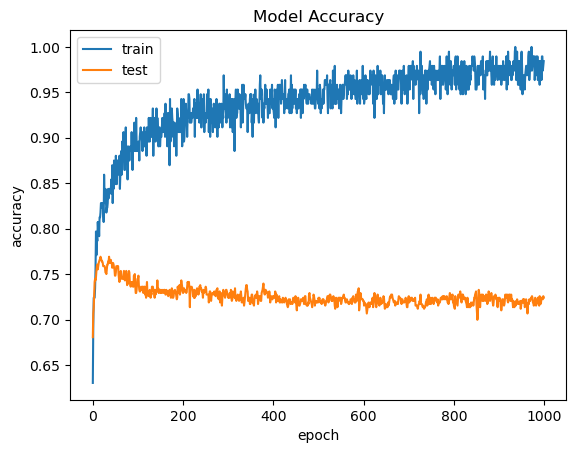

In [136]:
import matplotlib.pyplot as plt
%matplotlib inline
# Model accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

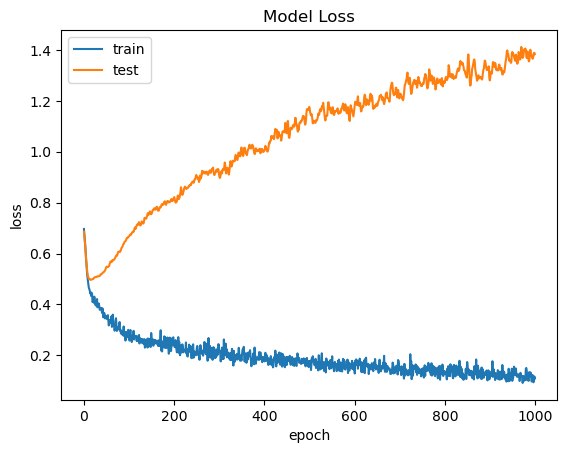

In [137]:
# Model Losss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

# 5.Results and Metrics

In [138]:
# generate classification report using predictions for categorical model
from sklearn.metrics import classification_report, accuracy_score

categorical_pred = np.argmax(model.predict(X_test), axis=1)

print('Results for Categorical Model')
print(accuracy_score(y_test, categorical_pred))
print(classification_report(y_test, categorical_pred))

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 763us/step
Results for Categorical Model
0.7309027777777778
              precision    recall  f1-score   support

           0       0.80      0.78      0.79       375
           1       0.61      0.64      0.62       201

    accuracy                           0.73       576
   macro avg       0.71      0.71      0.71       576
weighted avg       0.73      0.73      0.73       576



In [ ]:
## Precision: Precision is the ratio of correctly predicted positive
## observations to the total predicted positives. 

##Recall: Recall is the ratio of correctly predicted positive
##  observations to the all observations in actual class.

## F1-score: The F1-score is the harmonic mean of precision and recall. 
## It provides a balance between precision and recall. 

In [139]:
# generate classification report using predictions for binary model
from sklearn.metrics import classification_report, accuracy_score
# generate classification report using predictions for binary model 
binary_pred = np.round(binary_model.predict(X_test)).astype(int)

print('Results for Binary Model')
print(accuracy_score(Y_test_binary, binary_pred))
print(classification_report(Y_test_binary, binary_pred))

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 758us/step
Results for Binary Model
0.7239583333333334
              precision    recall  f1-score   support

           0       0.78      0.79      0.79       375
           1       0.61      0.59      0.60       201

    accuracy                           0.72       576
   macro avg       0.70      0.69      0.69       576
weighted avg       0.72      0.72      0.72       576



In [145]:
arr= np.array([[4,99,76,15,51,23.2,0.223,21]])
arr=(arr-mean)/std
output =binary_model.predict(arr)
output[0][0]
# out=np.argmax(binary_model.predict(arr))
# out

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


1.0

In [42]:
import pickle
import os


In [40]:
#pickle.dump(model,open('cnn_model.pkl','wb'))

In [43]:
model.save(os.path.join('CNN_model.h5'))

array([  3.36738361,  31.95179591,  19.34320163,  15.94182863,
       115.16894926,   7.87902573,   0.33111282,  11.75257265])